In [17]:
%matplotlib inline 
import numpy as np
import pandas as pd
import random as rd
from PIL import Image
from matplotlib import pyplot as plt

In [18]:
def kmeansinit(X,k):
    randperm=[i for i in range(X.shape[0])]
    rd.shuffle(randperm)
    return X[tuple(randperm[0:k]),:]
    

In [19]:
def findClosestCentroids(X,centroids):
    idx=np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        idx[0]=0
        min=(X[i,:]-centroids[0,:]).dot((X[i,:]-centroids[0,:]).T)
        for j in range(1,k):
            m=(X[i,:]-centroids[j,:]).dot((X[i,:]-centroids[j,:]).T)
            if m<=min:
                min=m
                idx[i]=j
    return idx

In [20]:
def computeCentroids(X,idx,k):
    m,n=X.shape
    centroids=np.zeros((k,n))
    for i in range(k):
        c=0
        centroids[i,:]=np.mean(X[idx==i])
#         print(i,centroids[i,:])
    return centroids

In [21]:
def runkmeans(X,intitial_centroids,max_iters):
    
    m,n=X.shape
    k=initial_centroids.shape[0]
    centroids=initial_centroids
    previous_centroids=centroids
    idx=np.zeros(m)
    
    
    for i in range(max_iters):
        idx=findClosestCentroids(X,centroids)
        centroids=computeCentroids(X,idx,k)
    return centroids,idx
        

In [22]:
img=Image.open('bird_small.png')

print(img.format)
print(img.size)
print(img.mode)

PNG
(128, 128)
RGB


In [23]:
np_img=np.array(img)
print(np_img[0][0])

[219 180 103]


In [24]:
# np_img=np_img/255
# np_img

In [25]:
X=np_img.reshape(img.size[0]*img.size[1],3)
# X

In [26]:
k=16
max_iters=10
initial_centroids=kmeansinit(X,k)
print(initial_centroids.shape)

(16, 3)


In [27]:
centroids,idx=runkmeans(X,initial_centroids,max_iters)
print(idx.dtype)

float64


In [28]:
X_recovered=centroids[idx.astype(int),:]
X_recovered=X_recovered.reshape(np_img.shape)

In [33]:
print(np_img.shape)
print(X_recovered.shape)

(128, 128, 3)
(128, 128, 3)


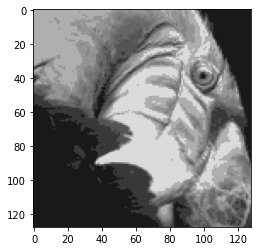

In [34]:
plt.imshow((X_recovered).astype(np.uint8))
plt.show()

In [35]:
im = Image.fromarray((X_recovered).astype(np.uint8))
im.save("compressed.png")